Perceptron Accuracy on Test Data: 94.68%


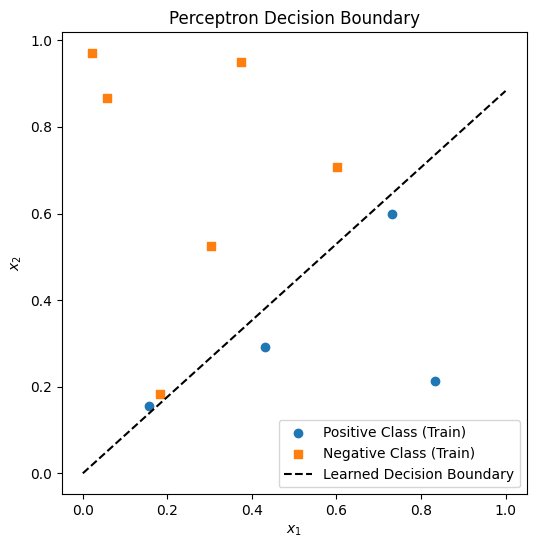

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# setting random seed for reproducibility
np.random.seed(42)

# generating 10 training points inside the unit square
X_train = np.random.rand(10, 2)  # 10 points in 2D space
y_train = np.where(X_train[:, 0] > X_train[:, 1], 1, -1)  # label based on x1 > x2

# implementing the Perceptron Algorithm with Perceptron Criterion Loss
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        # using Perceptron Criterion Loss function
        for epoch in range(self.epochs):
            misclassified = 0  # track number of misclassified points
            for i in range(len(X)):
                prediction = np.sign(np.dot(self.weights, X[i]) + self.bias)

                if prediction != y[i]:  # only update if misclassified
                    misclassified += 1
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

            if misclassified == 0:  # stop early if no misclassification
                break

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

# training perceptron on 10 training points
perceptron = Perceptron()
perceptron.fit(X_train, y_train)

# generating 5000 test points inside the unit square
num_test = 5000
X_test = np.random.rand(num_test, 2)  # 5000 points in 2D space
y_test = np.where(X_test[:, 0] > X_test[:, 1], 1, -1)  # label test points using same rule

# predicting labels for test points
y_pred = perceptron.predict(X_test)

# computing accuracy
accuracy = np.mean(y_pred == y_test)
print(f"Perceptron Accuracy on Test Data: {accuracy * 100:.2f}%")

# visualizing decision boundary
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], marker='o', label="Positive Class (Train)")
ax.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], marker='s', label="Negative Class (Train)")

# plotting the decision boundary: x1 = x2
x_vals = np.linspace(0, 1, 100)
y_vals = (-perceptron.weights[0] * x_vals - perceptron.bias) / (perceptron.weights[1] + 1e-6)  # avoiding division by zero
ax.plot(x_vals, y_vals, 'k--', label="Learned Decision Boundary")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Perceptron Decision Boundary")
ax.legend()
plt.show()


#### Question 2

Hinge Loss Perceptron Accuracy on Test Data: 94.18%


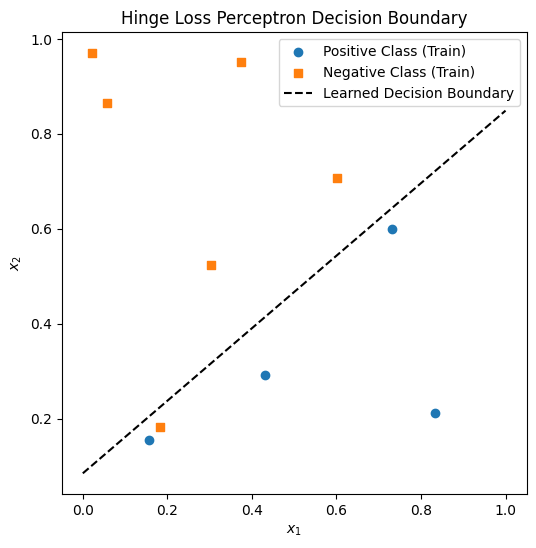

In [9]:
# defining the Hinge-Loss Perceptron class
class HingeLossPerceptron:
    def __init__(self, learning_rate=0.1, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_features = X.shape[1]
        self.weights = np.zeros(num_features)
        self.bias = 0

        for epoch in range(self.epochs):
            misclassified = 0
            for i in range(len(X)):
                margin = y[i] * (np.dot(self.weights, X[i]) + self.bias)

                if margin < 1:  # Hinge-loss update
                    misclassified += 1
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]

            if misclassified == 0:  # stop early if no misclassification
                break

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)


# generating training data (same as question 1)
np.random.seed(42)
num_train = 10
X_train = np.random.rand(num_train, 2)
y_train = np.where(X_train[:, 0] > X_train[:, 1], 1, -1)  # labels based on x1 > x2


# training the Perceptron with Hinge-Loss
hinge_perceptron = HingeLossPerceptron(learning_rate=0.1, epochs=100)
hinge_perceptron.fit(X_train, y_train)

# generating 5000 test points
num_test = 5000
X_test = np.random.rand(num_test, 2)
y_test = np.where(X_test[:, 0] > X_test[:, 1], 1, -1)  # true labels

# predicting on test set
y_pred_hinge = hinge_perceptron.predict(X_test)

# computing accuracy
accuracy_hinge = np.mean(y_pred_hinge == y_test)
print(f"Hinge Loss Perceptron Accuracy on Test Data: {accuracy_hinge * 100:.2f}%")


# visualizing decision boundary
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], marker='o', label="Positive Class (Train)")
ax.scatter(X_train[y_train == -1][:, 0], X_train[y_train == -1][:, 1], marker='s', label="Negative Class (Train)")

# plotting the decision boundary (x1 = x2 line)
x_vals = np.linspace(0, 1, 100)
y_vals = (-hinge_perceptron.weights[0] * x_vals - hinge_perceptron.bias) / (hinge_perceptron.weights[1] + 1e-6)  # avoiding division by zero
ax.plot(x_vals, y_vals, 'k--', label="Learned Decision Boundary")

ax.set_xlabel("$x_1$")
ax.set_ylabel("$x_2$")
ax.set_title("Hinge Loss Perceptron Decision Boundary")
ax.legend()
plt.show()


#### Question 3

In this case, the Perceptron Criterion loss performed slightly better (94.68%) than Hinge-loss (94.18%). This might be due to the small training set size (only 10 points), where the perceptron’s strict classification rule was sufficient to correctly classify most test points. However, I would normally expect hinge-loss to generalize better to test data in larger datasets.

#### Question 4

I would expect the Hinge-loss classifier to be more stable compared to the Perceptron Criterion when using different training sets. This is because Hinge-loss maximizes the margin between classes, making the decision boundary less sensitive to small changes in the training data.

On the other hand, the Perceptron Criterion simply updates weights based on misclassifications and does not consider maximizing the margin. This can lead to a more variable decision boundary depending on the specific 10 training points chosen.

Therefore, the classification of the 5000 test instances will likely change less when using Hinge-loss compared to the Perceptron Criterion.